### 시계열 데이터 분석

- 시간의 흐름에 따라 변화하는 데이터의 추이가 존재하는 경우
> 웹 트래픽, 주식 데이터 등등
- TimeSeries 분석은 통상적으로 어려운 작업 이해
> 원데이터의 안정성 판정
> - 안정한 형태로 변환
> - 예측 모델 및 선정, 검증
> - 통계학적인 깊은 이해가 필요하다고 알려져 있다.
- 페이스북에서 만든 fbprophet 모듈을 사용하여 정확도를 높이겠다.
- 개발 환경 보정
- conda install -c conda-forge fbprophet
> 주식 데이터는 구글 파이낸스(x), 야후를 활용(API(래핑한 모듈로)로 손쉽게 가져옴)
> pip install pandas-datareader fix_yahoo_finance prophet

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 시각화 결과물을 주피터에 내장 시키기 위해 
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#분석용
import pandas as pd 
import numpy as np
#주식 데이터 로드용
from pandas_datareader import data

from fbprophet import Prophet
from datetime import datetime



In [7]:
web_traffic_df = pd.read_csv('./data/webTraffic.csv', encoding='utf8', names=['날짜','클릭수'],index_col = 0, thousands =',')

In [6]:
pd.read_csv('./data/webTraffic.csv', encoding='utf8', names=['날짜','클릭수'])

,날짜,클릭수
0,16. 7. 1.,766
1,16. 7. 2.,377
2,16. 7. 3.,427
3,16. 7. 4.,902
4,16. 7. 5.,850
5,16. 7. 6.,876
6,16. 7. 7.,868
7,16. 7. 8.,785
8,16. 7. 9.,417
9,16. 7. 10.,550


In [7]:
pd.read_csv('./data/webTraffic.csv', encoding='utf8', names=['날짜','클릭수'], thousands =',')

,날짜,클릭수
0,16. 7. 1.,766.0
1,16. 7. 2.,377.0
2,16. 7. 3.,427.0
3,16. 7. 4.,902.0
4,16. 7. 5.,850.0
5,16. 7. 6.,876.0
6,16. 7. 7.,868.0
7,16. 7. 8.,785.0
8,16. 7. 9.,417.0
9,16. 7. 10.,550.0


In [8]:
web_traffic_df.head(2)

,클릭수
날짜,
16. 7. 1.,766.0
16. 7. 2.,377.0


In [9]:
len(web_traffic_df)

366

In [11]:
# null
web_traffic_df=web_traffic_df[web_traffic_df['클릭수'].notnull()]

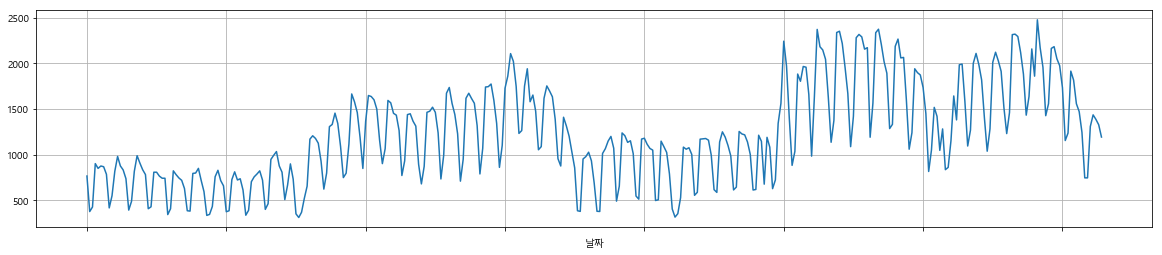

In [12]:
# x축은 날짜, y축은 클릭수 
web_traffic_df['클릭수'].plot(figsize=(20,4), grid=True)

In [15]:
# 주기성 확인
# 시간 축에 대한 클릭데이터 그래프가 어떤 의미를 가지는지 함수로 표현
# 현재 데이터를 기준으로 모델을 만들고 싶다 -> 이런 류 -> 회쉬(Regression)

In [20]:
hits = web_traffic_df['클릭수'].values
# print(hits)
time = np.arange(0,len(web_traffic_df['클릭수']))
# time

In [31]:
# 0~364까지 일수는 총 365일에 대한 1000개 데이터가 들어가도록 처리
# 뭔소린지 모르겠고 0~365사이에 1000개의 데이터 생성
fx = np.linspace(0, time[-1], 1000)
fx

array([  0.        ,   0.36436436,   0.72872873,   1.09309309,
         1.45745746,   1.82182182,   2.18618619,   2.55055055,
         2.91491491,   3.27927928,   3.64364364,   4.00800801,
         4.37237237,   4.73673674,   5.1011011 ,   5.46546547,
         5.82982983,   6.19419419,   6.55855856,   6.92292292,
         7.28728729,   7.65165165,   8.01601602,   8.38038038,
         8.74474474,   9.10910911,   9.47347347,   9.83783784,
        10.2022022 ,  10.56656657,  10.93093093,  11.2952953 ,
        11.65965966,  12.02402402,  12.38838839,  12.75275275,
        13.11711712,  13.48148148,  13.84584585,  14.21021021,
        14.57457457,  14.93893894,  15.3033033 ,  15.66766767,
        16.03203203,  16.3963964 ,  16.76076076,  17.12512513,
        17.48948949,  17.85385385,  18.21821822,  18.58258258,
        18.94694695,  19.31131131,  19.67567568,  20.04004004,
        20.4044044 ,  20.76876877,  21.13313313,  21.4974975 ,
        21.86186186,  22.22622623,  22.59059059,  22.95

In [34]:
# 어떤 데이터를 모델로 표현하는데, 모델의 적합성 확인 필요
# 입력 대비 출력의 만족할만한 식을 찾아야 한다.
# polyfit() : y데이터에 대한 최적의 피팅인 n차 다항식 f(x)의 계수를 반환
# 1차함수
fp1 = np.polyfit(time, hits, 1)
f1 = np.poly1d(fp1)
# 2차함수
fp2 = np.polyfit(time, hits, 2)
f2 = np.poly1d(fp2)
# 3차 함수
fp3 = np.polyfit(time, hits, 3)
f3 = np.poly1d(fp3)
# 15차 함수
fp15 = np.polyfit(time, hits, 15)
f15 = np.poly1d(fp15)

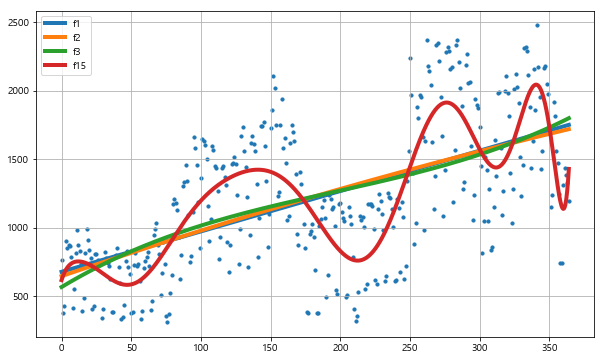

In [36]:
# 시각화
plt.figure(figsize=(10,6))
# 데이터
plt.scatter(time, hits, s=10)
plt.plot(fx, f1(fx),lw=4, label='f1')
plt.plot(fx, f2(fx),lw=4, label='f2')
plt.plot(fx, f3(fx),lw=4, label='f3')
plt.plot(fx, f15(fx),lw=4, label='f15')
# 데코레이션
plt.grid()
plt.legend()
#보이기

plt.show()

### 결과
- 1, 2, 3차를 더 적용해도 차이가 없다.
- 15차는 그래프를 따라가나, 적중률이 아주 높다(과적합 : overfitting) 예측이 된다.
- 현재 방식으로는 모델의 결과를 낼 수 없어서 예측이 불가하다. 

### 페이스북에서 제공하는 모듈로 예측
- Prophet 모듈 사용

In [38]:
dic = {'ds':web_traffic_df.index, 'y':web_traffic_df['클릭수']}
df = pd.DataFrame(dic)
df.head()

,ds,y
날짜,,
16. 7. 1.,16. 7. 1.,766.0
16. 7. 2.,16. 7. 2.,377.0
16. 7. 3.,16. 7. 3.,427.0
16. 7. 4.,16. 7. 4.,902.0
16. 7. 5.,16. 7. 5.,850.0


In [39]:
# 인덱스 리셋
df.reset_index(inplace=True)
df.head()

,날짜,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0


In [42]:
# ds 부분 포멧 리세팅
df['ds']=pd.to_datetime(df['ds'],format='%y. %m. %d.')
del df['날짜']

In [43]:
df

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0
5,2016-07-06,876.0
6,2016-07-07,868.0
7,2016-07-08,785.0
8,2016-07-09,417.0
9,2016-07-10,550.0


In [44]:
# Prophet() 함수 사용할 때 주기성 지정
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
#데이터 세팅
m.fit(df)


In [47]:
# 60 일 날짜 추가
fu = m.make_future_dataframe(periods = 60)
fu.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [48]:
len(fu)-len(df)

60

In [50]:
# 예측 
forecast = m.predict(fu)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,824.576922,520.410852,925.714912,824.576922,824.576922,-94.335613,-94.335613,-94.335613,236.084315,...,-51.467790,-51.467790,-51.467790,-278.952139,-278.952139,-278.952139,0.0,0.0,0.0,730.241309
1,2016-07-02,825.416679,82.658195,512.859717,825.416679,825.416679,-525.935009,-525.935009,-525.935009,236.084315,...,-467.268743,-467.268743,-467.268743,-294.750582,-294.750582,-294.750582,0.0,0.0,0.0,299.481669
2,2016-07-03,826.256435,197.889370,640.857532,826.256435,826.256435,-406.571231,-406.571231,-406.571231,236.084315,...,-335.184312,-335.184312,-335.184312,-307.471234,-307.471234,-307.471234,0.0,0.0,0.0,419.685205
3,2016-07-04,827.096192,758.113661,1173.649129,827.096192,827.096192,135.972339,135.972339,135.972339,236.084315,...,217.224608,217.224608,217.224608,-317.336584,-317.336584,-317.336584,0.0,0.0,0.0,963.068531
4,2016-07-05,827.935949,781.417250,1186.133958,827.935949,827.935949,164.825671,164.825671,164.825671,236.084315,...,253.352629,253.352629,253.352629,-324.611273,-324.611273,-324.611273,0.0,0.0,0.0,992.761620


In [52]:
len(forecast.columns)
# ds, yhat, yhat_lower, yhat_upper

22

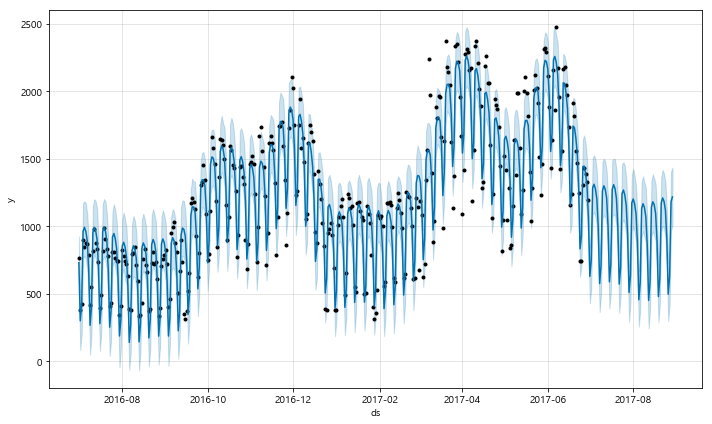

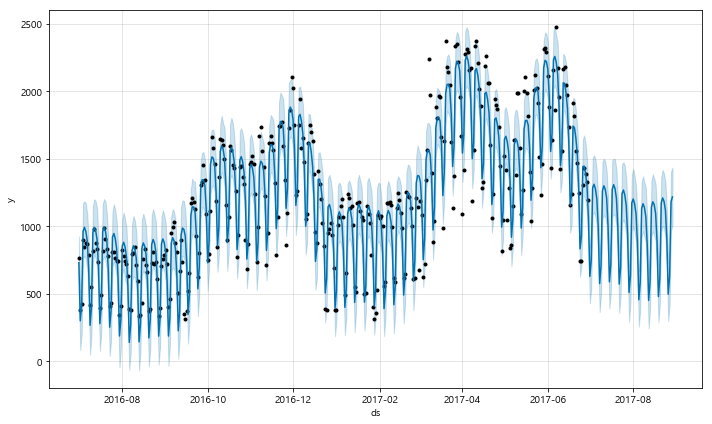

In [53]:
m.plot(forecast)

In [1]:
import nltk

In [3]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True